<a href="https://colab.research.google.com/github/vk0810-k/The-Sparks-Foundation-Codes/blob/main/GRIPSEPTEMBER2021/GRIPSEPTEMBER2021_TASK_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation**
# **GRIPSEPTEMBER2021**
# **Name: Varun Mahendra Khadayate**
# **Data Science & Business Analytics Intern**
# **Task 4:Exploratory Data Analysis - Terrorism**
# **Task Description:Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’**

*Lets Begin then!*

*Lets import important libraries first!*

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print("The libraries are imported 100%")

The libraries are imported 100%


*Lets import the dataset now!*

In [ ]:
df =  pd.read_csv('globalterrorismdb_0718dist.csv',encoding="latin")
print("The dataset has been imported 100%")

The dataset has been imported 100%


*Lets print the first 5 rows now!*

In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14.0,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10.0,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


*Lets check if there is any null value or not!*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5096 entries, 0 to 5095
Columns: 135 entries, eventid to related
dtypes: float64(64), int64(17), object(54)
memory usage: 5.2+ MB


*Lets rename the column name to keep the naming simple!*

In [ ]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)
print("The column name has been changed 100%")

The column name has been changed 100%


In [ ]:
df = df[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill','Wound','target1',
         'summary','Group','Targettype','Weapon','motive']]

*Lets do the data analysis now!*

In [ ]:
df['Wound'] = df['Wound'].fillna(0)
df['kill'] = df['kill'].fillna(0)
df['Casualities'] = df['kill'] + df['Wound']
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5096 entries, 0 to 5095
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         5096 non-null   int64  
 1   Month        5096 non-null   int64  
 2   day          5096 non-null   int64  
 3   Country      5096 non-null   object 
 4   State        5083 non-null   object 
 5   Region       5096 non-null   object 
 6   City         5096 non-null   object 
 7   latitude     5006 non-null   float64
 8   longitude    5006 non-null   float64
 9   Attacktype   5096 non-null   object 
 10  kill         5096 non-null   float64
 11  Wound        5096 non-null   float64
 12  target1      5039 non-null   object 
 13  summary      798 non-null    object 
 14  Group        5095 non-null   object 
 15  Targettype   5095 non-null   object 
 16  Weapon       5095 non-null   object 
 17  motive       536 non-null    object 
 18  Casualities  5096 non-null   float64
dtypes: flo

,Year,Month,day,latitude,longitude,kill,Wound,Casualities
count,5096.000000,5096.000000,5096.000000,5006.000000,5006.000000,5096.000000,5096.000000,5096.000000
mean,1973.809066,6.158359,15.303375,36.559454,-26.458558,0.647567,0.719192,1.366758
std,2.337862,3.293888,9.140459,22.836022,51.475161,3.033054,7.164589,8.232747
min,1970.000000,0.000000,0.000000,-43.532054,-157.818968,0.000000,0.000000,0.000000
25%,1972.000000,3.000000,7.000000,35.800916,-73.931351,0.000000,0.000000,0.000000
50%,1974.000000,6.000000,15.000000,41.400635,-5.956210,0.000000,0.000000,0.000000
75%,1976.000000,9.000000,23.000000,52.501530,7.519113,1.000000,0.000000,1.000000
max,1977.000000,12.000000,31.000000,59.332788,172.636225,92.000000,285.000000,295.000000


*Lets find the number of attacks per year!*

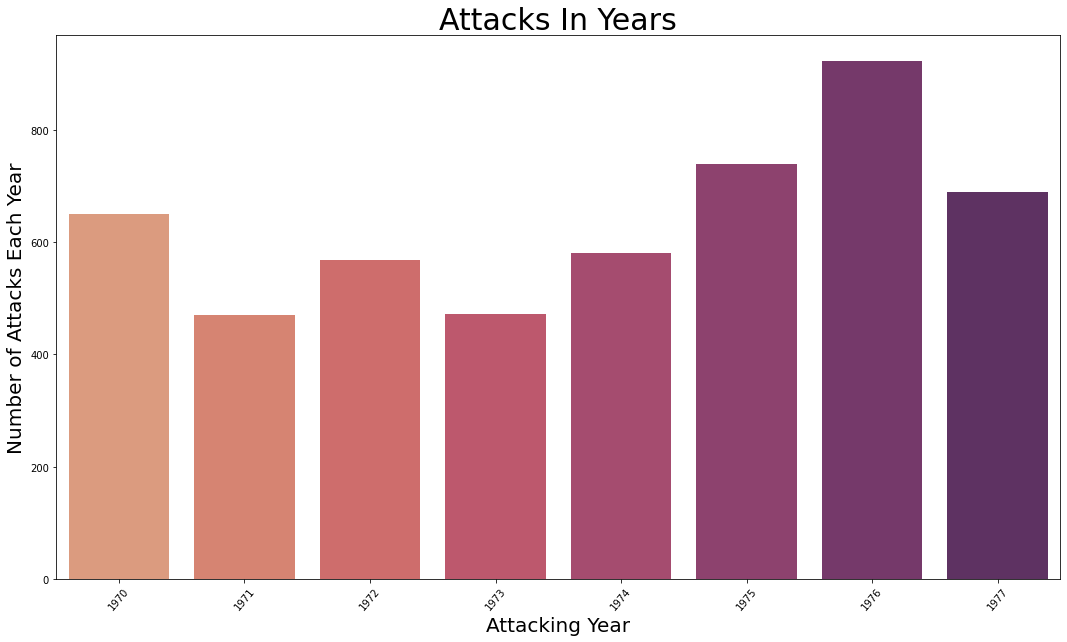

In [ ]:
year = df['Year'].unique()
years_count = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year,
           y = years_count,
           palette = "flare")
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.title('Attacks In Years',fontsize=30)
plt.show()

*Lets find the terrorist activities in every region over the year!*

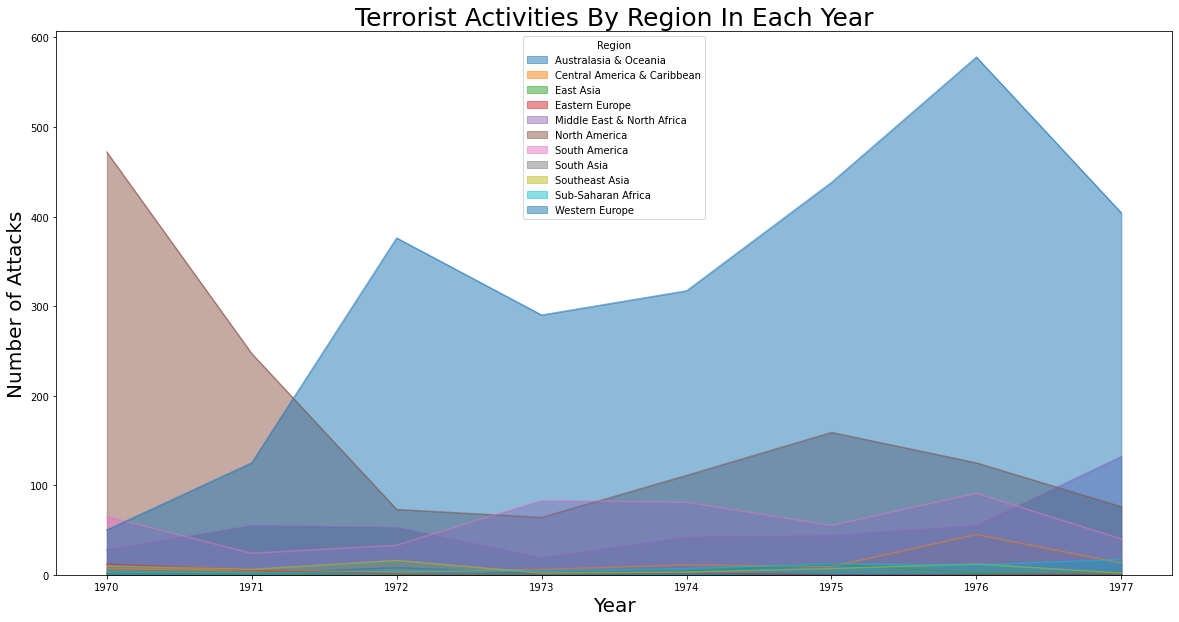

In [ ]:
pd.crosstab(df.Year, df.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

In [ ]:
attack = df.Country.value_counts()[:10]
attack

United States         1259
United Kingdom        1245
Italy                  368
Spain                  345
Argentina              279
West Germany (FRG)     225
Turkey                 222
France                 178
Greece                  82
Iran                    67
Name: Country, dtype: int64

In [ ]:
df.Group.value_counts()[1:10]

Irish Republican Army (IRA)            669
Protestant extremists                  184
Left-Wing Militants                    169
Ulster Volunteer Force (UVF)           159
Black September                        120
Basque Fatherland and Freedom (ETA)    103
Ulster Freedom Fighters (UFF)           90
Montoneros (Argentina)                  88
Black Nationalists                      82
Name: Group, dtype: int64

*Lets find the countries affected by this attacks !*

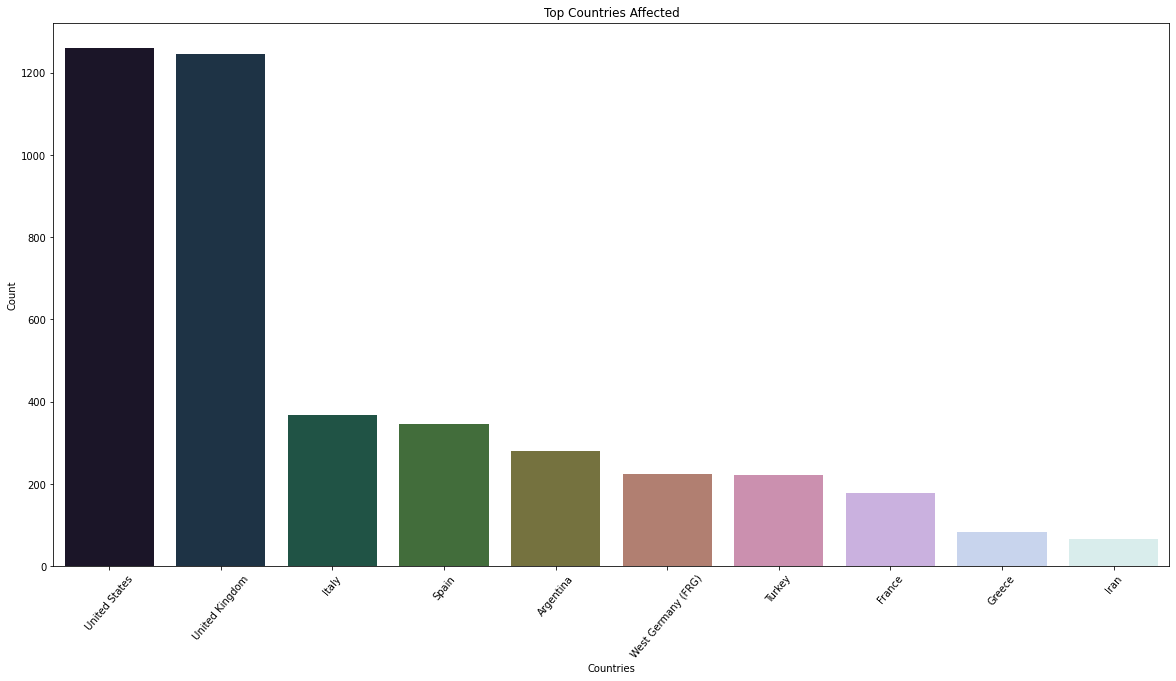

In [ ]:
plt.subplots(figsize=(20,10))
sns.barplot(df['Country'].value_counts()[:10].index,df['Country'].value_counts()[:10].values,palette='cubehelix')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

*Lets find the number of people died over the years due to the attacks!*

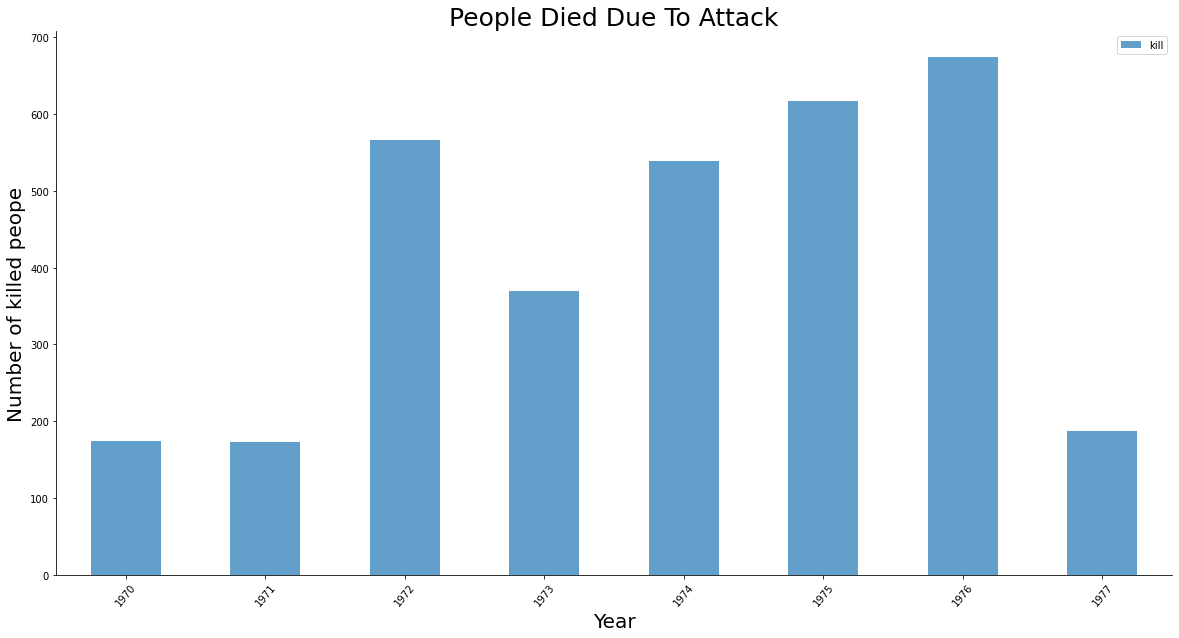

In [ ]:
data = df[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
data.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title("People Died Due To Attack",fontsize=25)
plt.ylabel("Number of killed peope",fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)


*Lets find the top 10 affected city!*

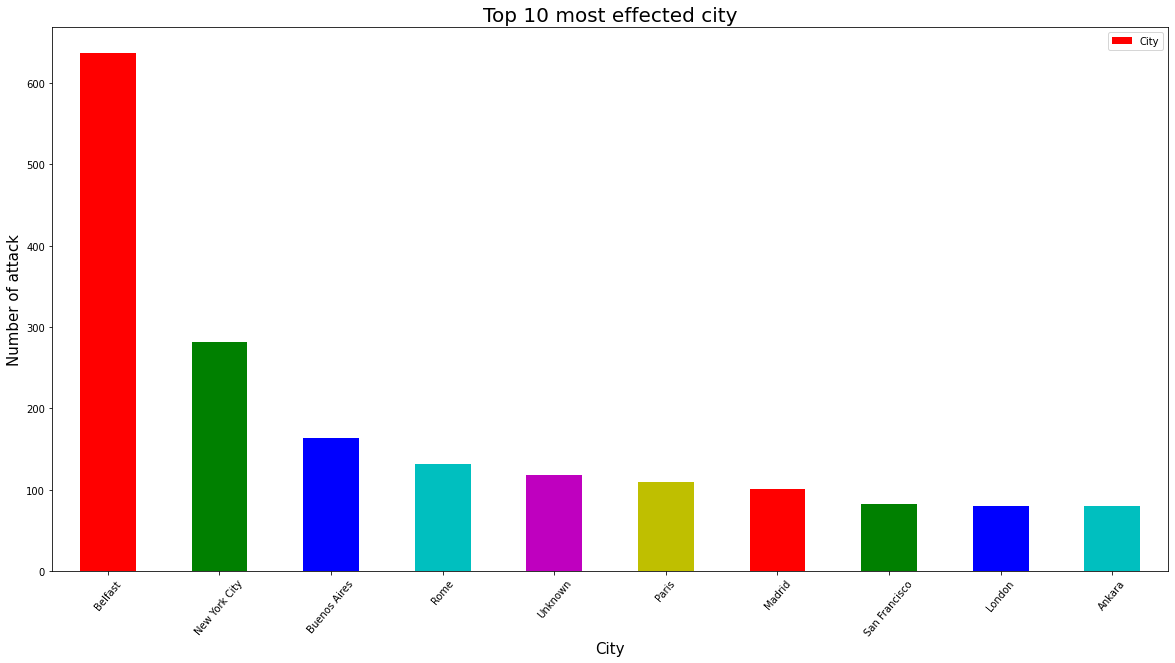

In [ ]:
df['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='rgbcmy')
plt.xticks(rotation = 50)
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Top 10 most effected city",fontsize=20)
plt.show()

*Lets find the number of attacks by the attack types!*

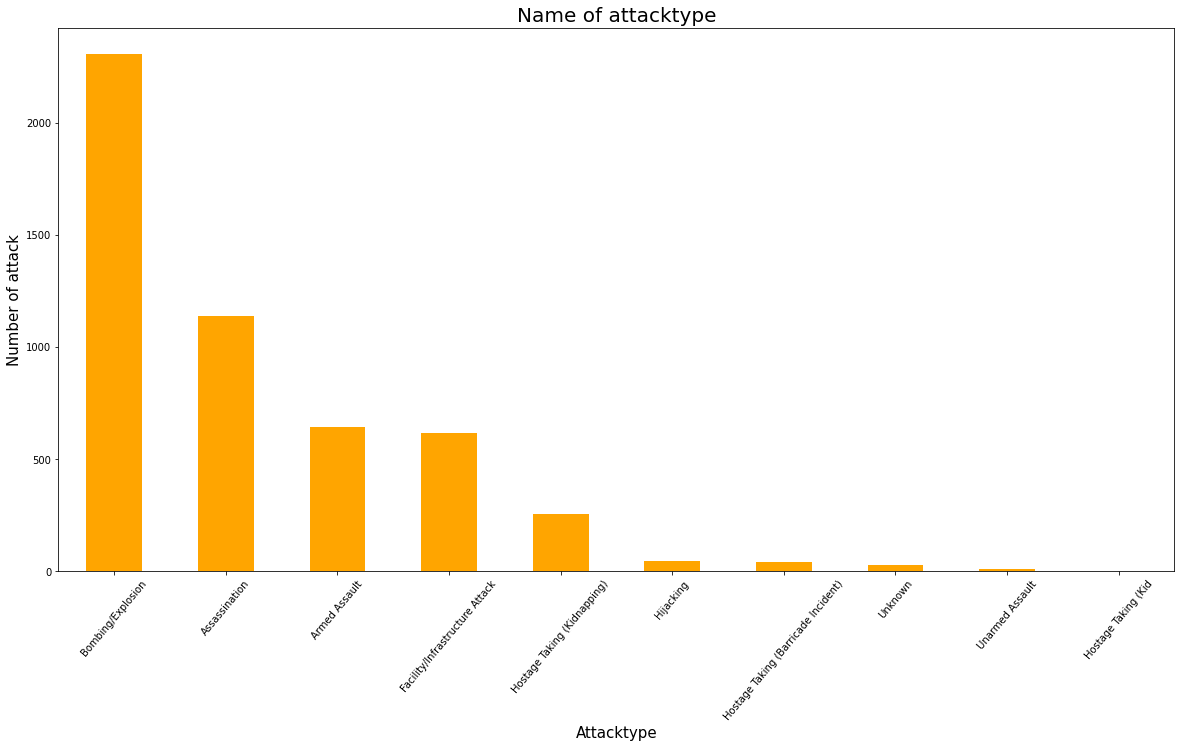

In [ ]:
df['Attacktype'].value_counts().plot(kind='bar',figsize=(20,10),color='orange')
plt.xticks(rotation = 50)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Name of attacktype",fontsize=20)
plt.show()

*Lets find the number of people killed by various attack type!*

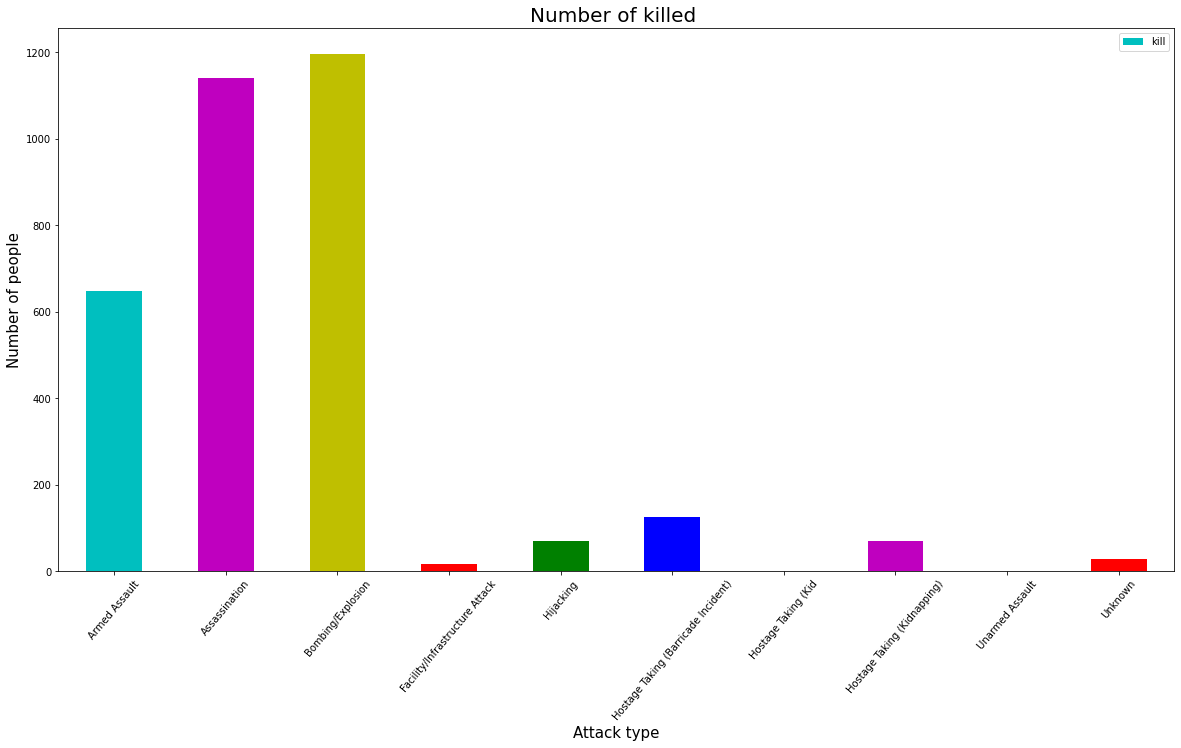

In [ ]:
df[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['cmyrgb'])
plt.xticks(rotation=50)
plt.title("Number of killed ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

*Lets find the number of people wounded by various attack type!*

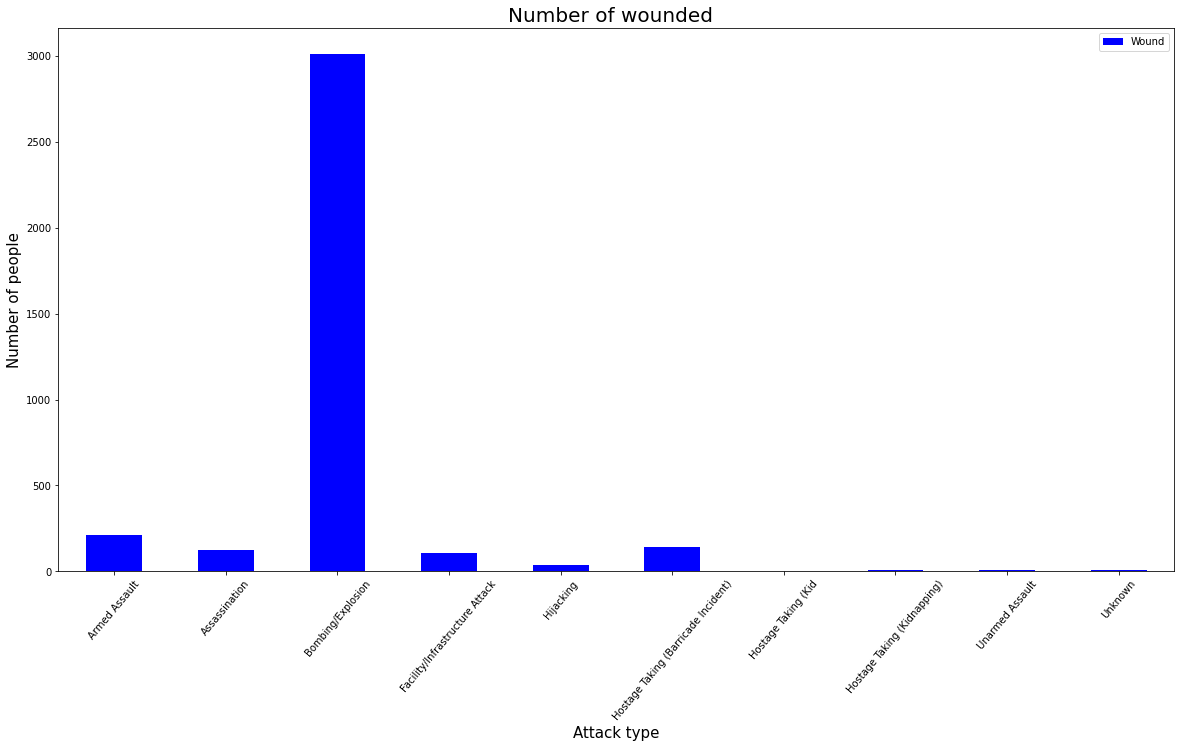

In [ ]:
df[['Attacktype','Wound']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['blue'])
plt.xticks(rotation=50)
plt.title("Number of wounded  ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

*Lets find the attack motto for the attacks per year!*

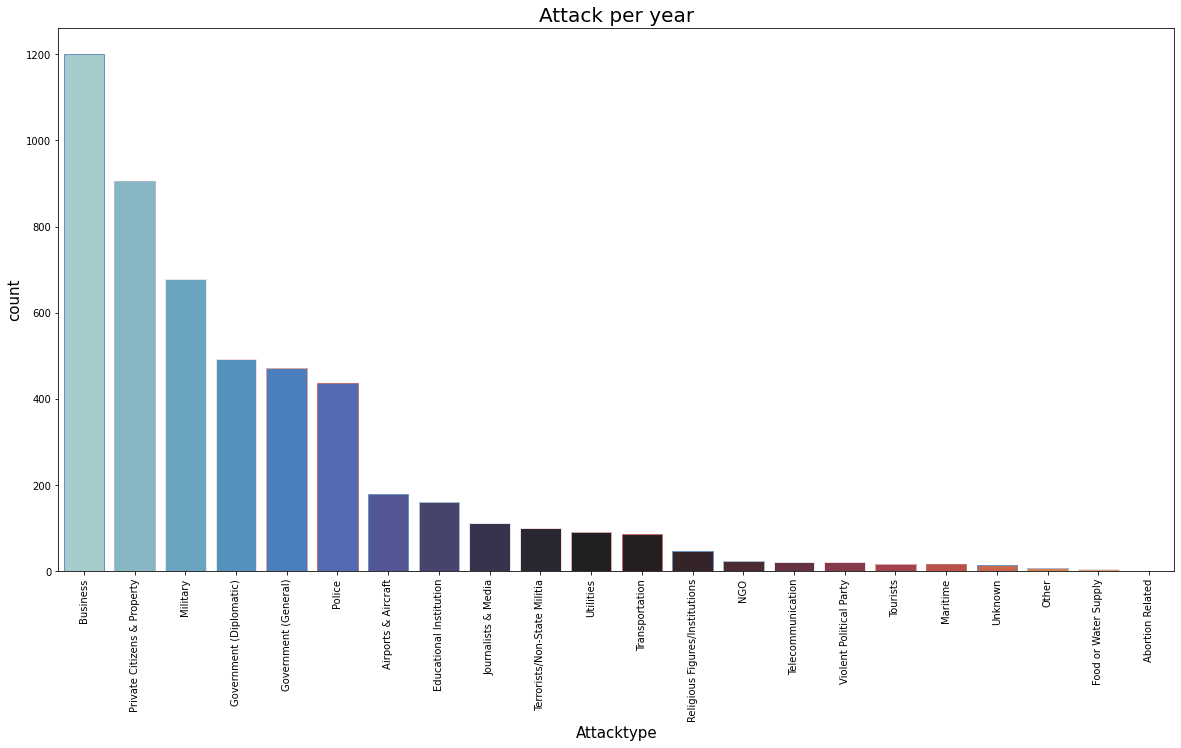

In [ ]:
plt.subplots(figsize=(20,10))
sns.countplot(df["Targettype"],order=df['Targettype'].value_counts().index,palette="icefire",edgecolor=sns.color_palette("vlag"));
plt.xticks(rotation=90)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Attack per year",fontsize=20)
plt.show()

*Lets find the top 10 terrorist group attack*

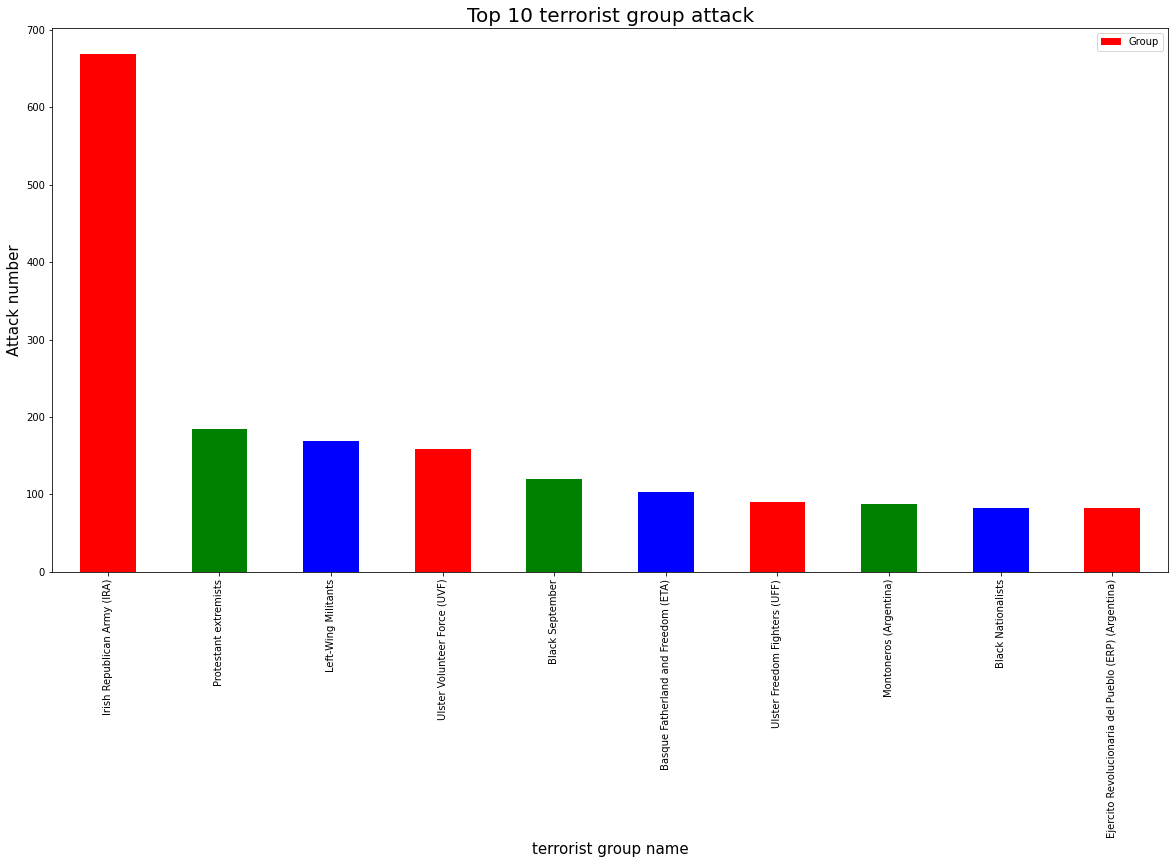

In [ ]:
df['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='rgb',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.show()

*Lets find the top 10 terrorist group attack on the basis of killing*

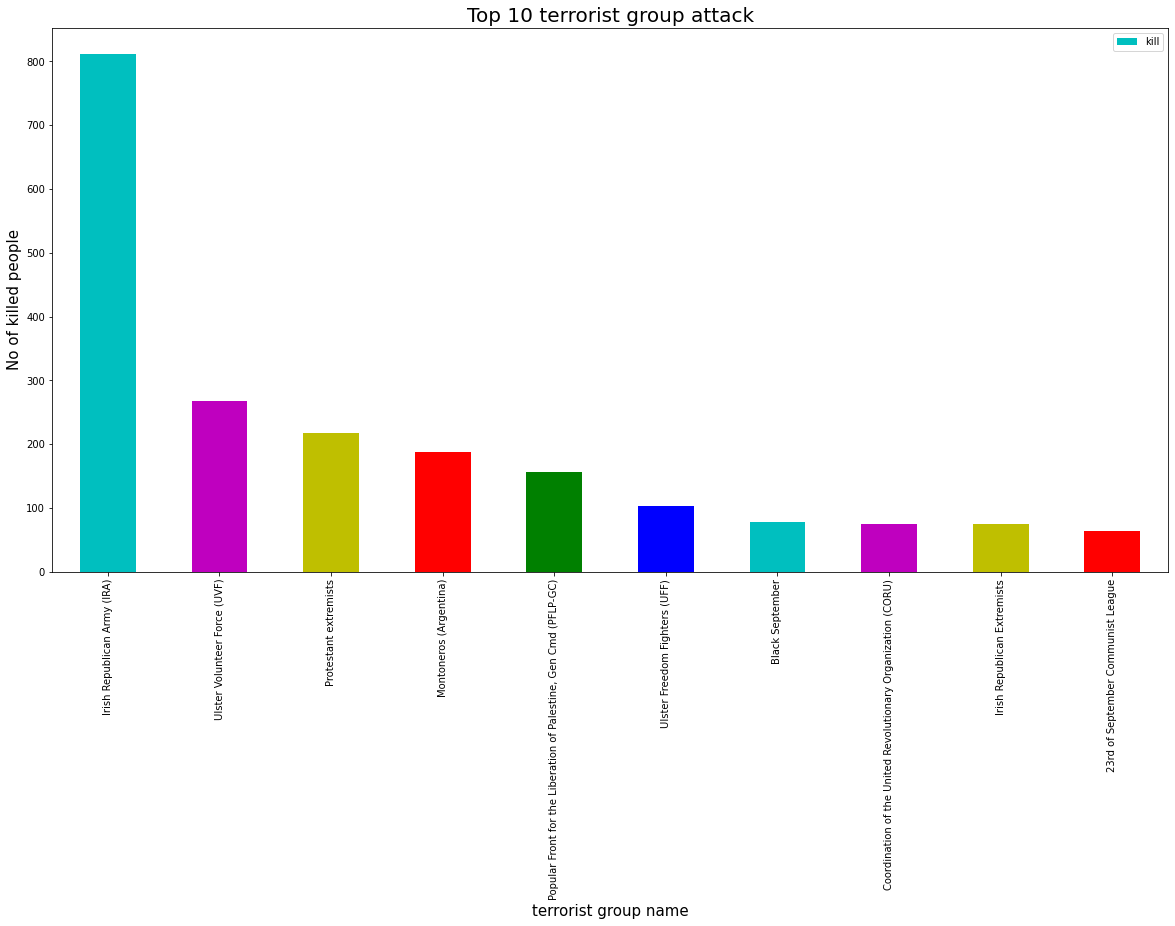

In [ ]:
df[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).plot(kind='bar',color='cmyrgb',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("No of killed people",fontsize=15)
plt.show()

In [ ]:
data=df[['Group','Country','kill']]
data=data.groupby(['Group','Country'],axis=0).sum().sort_values(
    'kill',ascending=False).drop('Unknown').reset_index().head(10)
data

,Group,Country,kill
0,Irish Republican Army (IRA),United Kingdom,804.0
1,Ulster Volunteer Force (UVF),United Kingdom,231.0
2,Protestant extremists,United Kingdom,214.0
3,Montoneros (Argentina),Argentina,187.0
4,Ulster Freedom Fighters (UFF),United Kingdom,100.0
5,"Popular Front for the Liberation of Palestine,...",Greece,88.0
6,Irish Republican Extremists,United Kingdom,75.0
7,Coordination of the United Revolutionary Organ...,Barbados,73.0
8,23rd of September Communist League,Mexico,63.0
9,Basque Fatherland and Freedom (ETA),Spain,52.0


In [ ]:
kill = df.loc[:,'kill']
print('Number of people killed by terror attack:', int(sum(kill.dropna())))

Number of people killed by terror attack: 3300


In [ ]:
typeKill = df.pivot_table(columns='Attacktype', values='kill', aggfunc='sum')
typeKill

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kid,Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,649.0,1140.0,1197.0,18.0,71.0,125.0,0.0,71.0,1.0,28.0


In [ ]:
countryKill = df.pivot_table(columns='Country', values='kill', aggfunc='sum')
countryKill

Country,Afghanistan,Algeria,Andorra,Angola,Argentina,Australia,Austria,Bahamas,Bangladesh,Barbados,Belgium,Bolivia,Botswana,Brazil,Brunei,Cambodia,Canada,Chad,Chile,Colombia,Costa Rica,Cyprus,Czechoslovakia,Dominican Republic,East Germany (GDR),Ecuador,Egypt,El Salvador,Ethiopia,France,Greece,Guatemala,Haiti,Honduras,India,Iran,Iraq,Ireland,Israel,Italy,...,New Zealand,Nicaragua,Nigeria,North Yemen,Pakistan,Panama,Paraguay,People's Republic of the Congo,Peru,Philippines,Poland,Portugal,Saudi Arabia,Singapore,Somalia,South Africa,South Korea,South Vietnam,South Yemen,Spain,Sri Lanka,Sudan,Sweden,Switzerland,Syria,Taiwan,Tanzania,Thailand,Trinidad and Tobago,Turkey,United Arab Emirates,United Kingdom,United States,Uruguay,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Yugoslavia,Zaire,Zambia
kill,0.0,0.0,0.0,0.0,298.0,1.0,9.0,0.0,0.0,73.0,0.0,0.0,1.0,2.0,0.0,3.0,2.0,0.0,0.0,19.0,0.0,1.0,26.0,1.0,1.0,1.0,1.0,7.0,8.0,20.0,114.0,33.0,0.0,0.0,4.0,22.0,12.0,58.0,132.0,103.0,...,0.0,11.0,3.0,0.0,6.0,0.0,2.0,0.0,0.0,94.0,0.0,3.0,0.0,0.0,0.0,6.0,1.0,81.0,0.0,99.0,1.0,3.0,4.0,47.0,7.0,25.0,0.0,2.0,0.0,32.0,1.0,1537.0,154.0,4.0,1.0,3.0,41.0,2.0,1.0,5.0


In [ ]:
print("Most popular Weapon Type :\n",df['Weapon'].value_counts().head())

Most popular Weapon Type :
 Explosives    2431
Firearms      1538
Incendiary     750
Unknown        313
Melee           39
Name: Weapon, dtype: int64


## *Lets find the most popular weapon used for the attacks!*

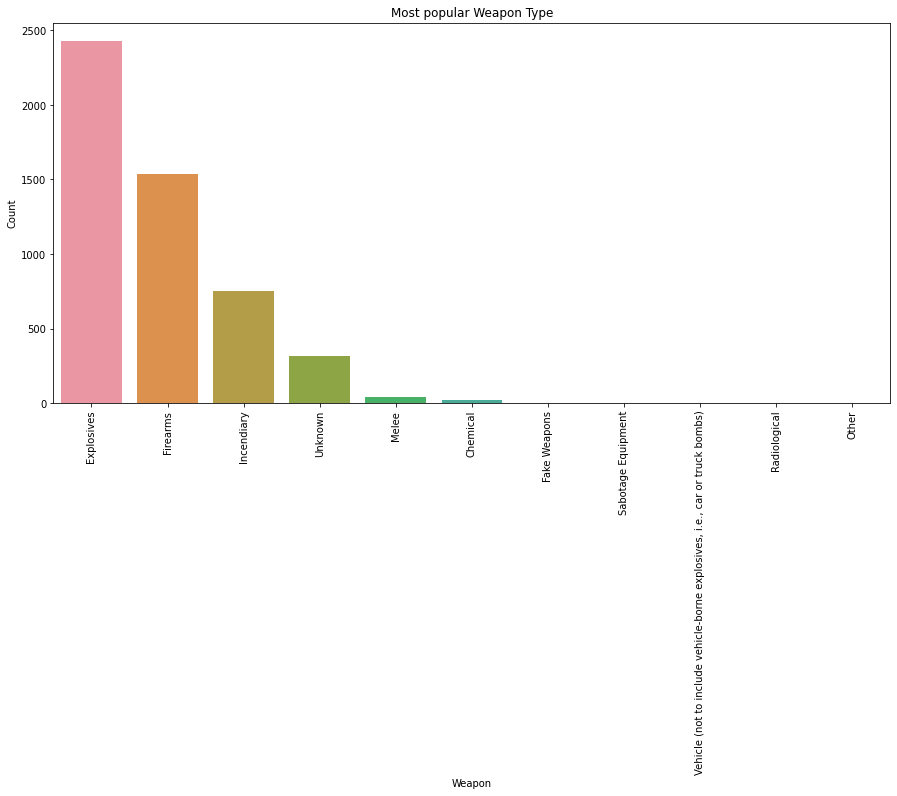

In [ ]:
plt.figure(figsize = (15,7))
sns.barplot(df['Weapon'].value_counts()[:15].index,df['Weapon'].value_counts()[:15].values)
plt.title('Most popular Weapon Type')
plt.xlabel('Weapon')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()


# **Conclusion**
# **Hot Zones :-**


*   **Country with the most attacks:** ***Iraq***
*   **City with the most attacks:** ***Baghdad***
*   **Region with the most attacks:** ***South Asia***
*   **Year with the most attacks:** ***2012***
*   **Group with the most attacks:** ***Peru***
*   **Most Attack Types:** ***Bombing/Explosion***
*   **The most popular weapon:** ***Explosives***